In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

584

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather.status_code

200

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":37.51,"feels_like":31.64,"temp_min":35.01,"temp_max":39.99,"pressure":1004,"humidity":87},"visibility":10000,"wind":{"speed":4.61,"deg":150},"clouds":{"all":90},"dt":1612572889,"sys":{"type":1,"id":3486,"country":"US","sunrise":1612525995,"sunset":1612562598},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [12]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 37.51,
  'feels_like': 31.64,
  'temp_min': 35.01,
  'temp_max': 39.99,
  'pressure': 1004,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 150},
 'clouds': {'all': 90},
 'dt': 1612572889,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612525995,
  'sunset': 1612562598},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 37.51,
  'feels_like': 31.64,
  'temp_min': 35.01,
  'temp_max': 39.99,
  'pressure': 1004,
  'humidity': 87},
 'visibility': 10000,
 'wind': {'speed': 4.61, 'deg': 150},
 'clouds': {'all': 90},
 'dt': 1612572889,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1612525995,
  'sunset': 1612562598},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Get the JSON data.
boston_data = city_weather.json()

In [16]:
boston_data['sys']['country']

'US'

In [17]:
boston_data['dt']

1612572889

In [18]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 39.99 87 90 4.61


In [19]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-02-06 00:54:49'

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | karabanovo
Processing Record 2 of Set 12 | maralal
Processing Record 3 of Set 12 | upernavik
Processing Record 4 of Set 12 | cherskiy
Processing Record 5 of Set 12 | antalaha
Processing Record 6 of Set 12 | rikitea
Processing Record 7 of Set 12 | sumkino
Processing Record 8 of Set 12 | niquelandia
Processing Record 9 of Set 12 | nikolskoye
Processing Record 10 of Set 12 | baturaja
Processing Record 11 of Set 12 | cidreira
Processing Record 12 of Set 12 | klaksvik
Processing Record 13 of Set 12 | khatanga
Processing Record 14 of Set 12 | qaanaaq
Processing Record 15 of Set 12 | airai
Processing Record 16 of Set 12 | taolanaro
City not found. Skipping...
Processing Record 17 of Set 12 | lompoc
Processing Record 18 of Set 12 | sao filipe
Processing Record 19 of Set 12 | adrar
Processing Record 20 of Set 12 | muravlenko
Processing Record 21 of Set 12 | butaritari
Processing Record 22 of Set 12 | var

Processing Record 32 of Set 15 | abbeville
Processing Record 33 of Set 15 | poum
Processing Record 34 of Set 15 | auki
Processing Record 35 of Set 15 | satitoa
City not found. Skipping...
Processing Record 36 of Set 15 | estelle
Processing Record 37 of Set 15 | dikson
Processing Record 38 of Set 15 | bantry
Processing Record 39 of Set 15 | semnan
Processing Record 40 of Set 15 | tiznit
Processing Record 41 of Set 15 | waddan
Processing Record 42 of Set 15 | tuktoyaktuk
Processing Record 43 of Set 15 | ilulissat
Processing Record 44 of Set 15 | koygorodok
Processing Record 45 of Set 15 | marcona
City not found. Skipping...
Processing Record 46 of Set 15 | mrirt
City not found. Skipping...
Processing Record 47 of Set 15 | tevriz
Processing Record 48 of Set 15 | saldanha
Processing Record 49 of Set 15 | linxi
Processing Record 50 of Set 15 | retz
Processing Record 1 of Set 16 | santa maria
Processing Record 2 of Set 16 | teodoro sampaio
Processing Record 3 of Set 16 | felipe carrillo puer

Processing Record 18 of Set 19 | teguise
Processing Record 19 of Set 19 | ponta delgada
Processing Record 20 of Set 19 | vao
Processing Record 21 of Set 19 | sitka
Processing Record 22 of Set 19 | chabahar
Processing Record 23 of Set 19 | barentsburg
City not found. Skipping...
Processing Record 24 of Set 19 | bambous virieux
Processing Record 25 of Set 19 | jumla
Processing Record 26 of Set 19 | niksic
Processing Record 27 of Set 19 | kashi
Processing Record 28 of Set 19 | providencia
Processing Record 29 of Set 19 | pak phanang
Processing Record 30 of Set 19 | geraldton
Processing Record 31 of Set 19 | kumluca
Processing Record 32 of Set 19 | phetchaburi
Processing Record 33 of Set 19 | weinan
Processing Record 34 of Set 19 | lata
Processing Record 35 of Set 19 | kloulklubed
Processing Record 36 of Set 19 | lagoa
Processing Record 37 of Set 19 | skjervoy
Processing Record 38 of Set 19 | pokanayevka
City not found. Skipping...
Processing Record 39 of Set 19 | les herbiers
Processing R

Processing Record 1 of Set 23 | robertsport
Processing Record 2 of Set 23 | omsukchan
Processing Record 3 of Set 23 | ruatoria
City not found. Skipping...
Processing Record 4 of Set 23 | cap malheureux
Processing Record 5 of Set 23 | kysyl-syr
Processing Record 6 of Set 23 | hihifo
City not found. Skipping...
Processing Record 7 of Set 23 | codrington
Processing Record 8 of Set 23 | maragogi
Processing Record 9 of Set 23 | kitgum
Processing Record 10 of Set 23 | ampere
Processing Record 11 of Set 23 | port pirie
Processing Record 12 of Set 23 | yamada
Processing Record 13 of Set 23 | makung
City not found. Skipping...
Processing Record 14 of Set 23 | marsh harbour
Processing Record 15 of Set 23 | soyo
Processing Record 16 of Set 23 | bridlington
Processing Record 17 of Set 23 | zarubino
Processing Record 18 of Set 23 | mirabad
Processing Record 19 of Set 23 | puerto madryn
Processing Record 20 of Set 23 | tshikapa
Processing Record 21 of Set 23 | taoudenni
Processing Record 22 of Set 2

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Karabanovo,56.3167,38.7000,1.36,92,100,8.90,RU,2021-02-06 01:05:02
1,Maralal,1.0968,36.6980,57.49,74,0,3.31,KE,2021-02-06 01:05:02
2,Upernavik,72.7868,-56.1549,4.53,71,100,6.06,GL,2021-02-06 00:59:22
3,Cherskiy,68.7500,161.3000,-14.53,77,30,0.98,RU,2021-02-06 00:59:17
4,Antalaha,-14.9003,50.2788,73.83,88,100,4.38,MG,2021-02-06 01:05:02
5,Rikitea,-23.1203,-134.9692,78.76,70,11,12.75,PF,2021-02-06 00:59:13
6,Sumkino,58.1108,68.3244,33.66,96,100,8.95,RU,2021-02-06 01:05:02
7,Niquelandia,-14.4739,-48.4597,72.73,89,100,2.44,BR,2021-02-06 01:00:34
8,Nikolskoye,59.7035,30.7861,10.00,78,75,11.18,RU,2021-02-06 00:59:22
9,Baturaja,-4.1333,104.1667,76.19,89,95,5.64,ID,2021-02-06 01:05:03


In [22]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karabanovo,RU,2021-02-06 01:05:02,56.3167,38.7000,1.36,92,100,8.90
1,Maralal,KE,2021-02-06 01:05:02,1.0968,36.6980,57.49,74,0,3.31
2,Upernavik,GL,2021-02-06 00:59:22,72.7868,-56.1549,4.53,71,100,6.06
3,Cherskiy,RU,2021-02-06 00:59:17,68.7500,161.3000,-14.53,77,30,0.98
4,Antalaha,MG,2021-02-06 01:05:02,-14.9003,50.2788,73.83,88,100,4.38
5,Rikitea,PF,2021-02-06 00:59:13,-23.1203,-134.9692,78.76,70,11,12.75
6,Sumkino,RU,2021-02-06 01:05:02,58.1108,68.3244,33.66,96,100,8.95
7,Niquelandia,BR,2021-02-06 01:00:34,-14.4739,-48.4597,72.73,89,100,2.44
8,Nikolskoye,RU,2021-02-06 00:59:22,59.7035,30.7861,10.00,78,75,11.18
9,Baturaja,ID,2021-02-06 01:05:03,-4.1333,104.1667,76.19,89,95,5.64


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

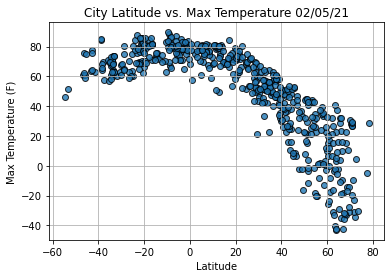

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

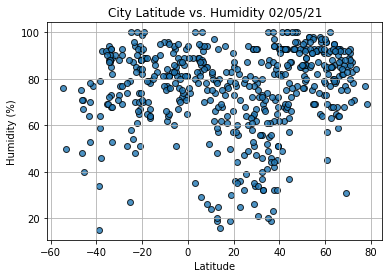

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

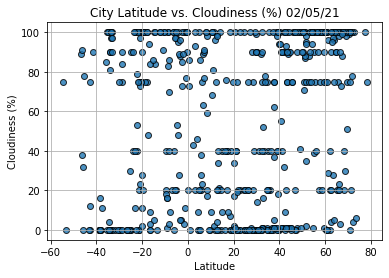

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

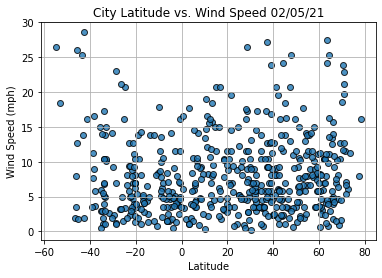

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

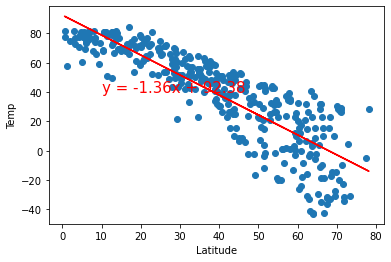

In [44]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = x_values * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create a scatter plot of the x and y values.
plt.scatter(x_values,y_values)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(x_values,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [45]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                      Qaanaaq
Country                        GL
Date          2021-02-06 00:59:19
Lat                        77.484
Lng                      -69.3632
Max Temp                     -4.9
Humidity                       77
Cloudiness                    100
Wind Speed                   7.94
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
520     True
521     True
522     True
523     True
524    False
Name: Lat, Length: 525, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Karabanovo,RU,2021-02-06 01:05:02,56.3167,38.7000,1.36,92,100,8.90
1,Maralal,KE,2021-02-06 01:05:02,1.0968,36.6980,57.49,74,0,3.31
2,Upernavik,GL,2021-02-06 00:59:22,72.7868,-56.1549,4.53,71,100,6.06
3,Cherskiy,RU,2021-02-06 00:59:17,68.7500,161.3000,-14.53,77,30,0.98
6,Sumkino,RU,2021-02-06 01:05:02,58.1108,68.3244,33.66,96,100,8.95


In [49]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

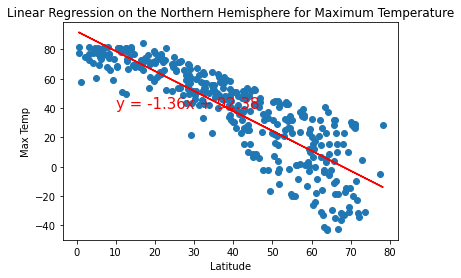

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

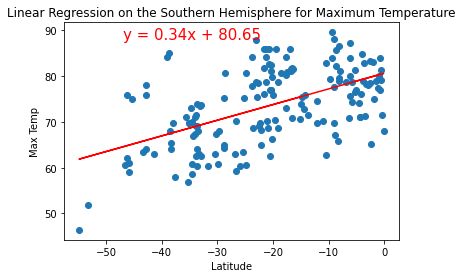

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-47,88))

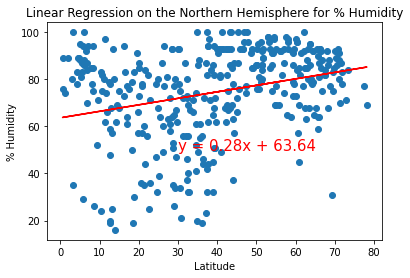

In [102]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(30,50))

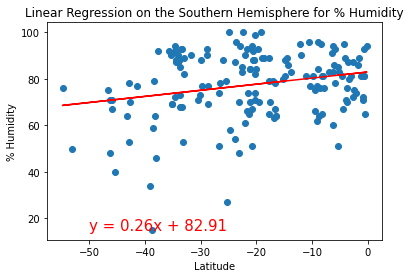

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

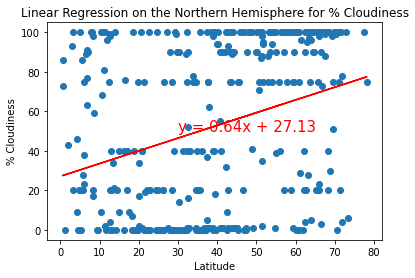

In [103]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,50))

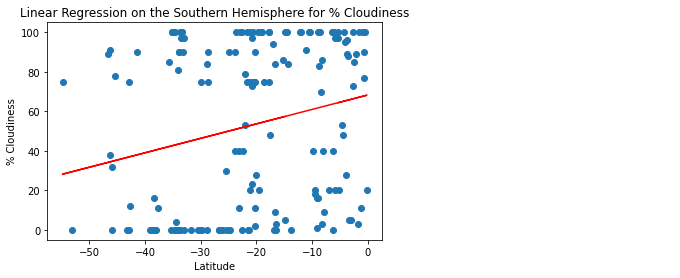

In [104]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(30,50))

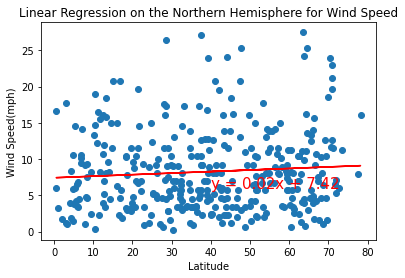

In [123]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed(mph)',(40,6))

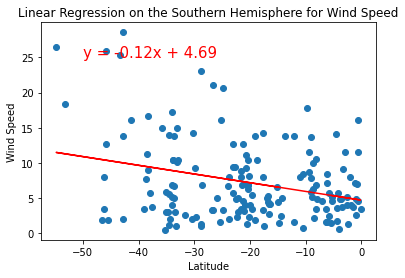

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,25))